### This Python code allows you to verify the `Law of Large Numbers (LLN)`, the `Central Limit Theorem (CLT)` and `Slutsky's Theorem` in one place. 

#### You can choose 3 different distributions  (Normal, Exponential and Binomial).

We usually start the code importing all the modules that we need to use.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from platform import python_version

The next code lines are just to check that we have the correct version of python and see the directory where we are going to save our results. This is just a subtelty.

In [2]:
# The recommended python version is 3.8 or 3.9
print(python_version())
# Check current directory
os.getcwd()

3.9.13


'/Users/federico/Dropbox/nonlineareconometrics2024/FEDERICO/Python_codes'

Let us control the size of the figures here.

In [3]:
# Adjust the plot size on your computer
plt.rcParams['figure.figsize'] = [8, 8]

### Modify the cell below to try different theorems, different distributions and different parameters for each distribution

### `theorem`: Choose **1** for the LLN, **2** for the CLT without standardization, **3** for the CLT with standardization and 4 for Slutsky's theorem

### `distribution`: Choose **1** for the Normal Distribution, **2** for the Exponential, **3** for the Binomial

In [4]:
theorem = 1
distribution = 1

In [5]:
sample_size = 1000        # Choose the number of observations to show convergence
number_of_samples = 1000  # This is for the CLT and Slutsky's theorem only (theorem = 2,3 or 4)

true_mean = 2             # mean of the population (for Normal and Exponential)
true_variance = 1         # variance of the population (for Normal)
prob_success = .2         # prob of success for the Binomial distribution
number_trials = 50        # number of trials for the Binomilal distribution

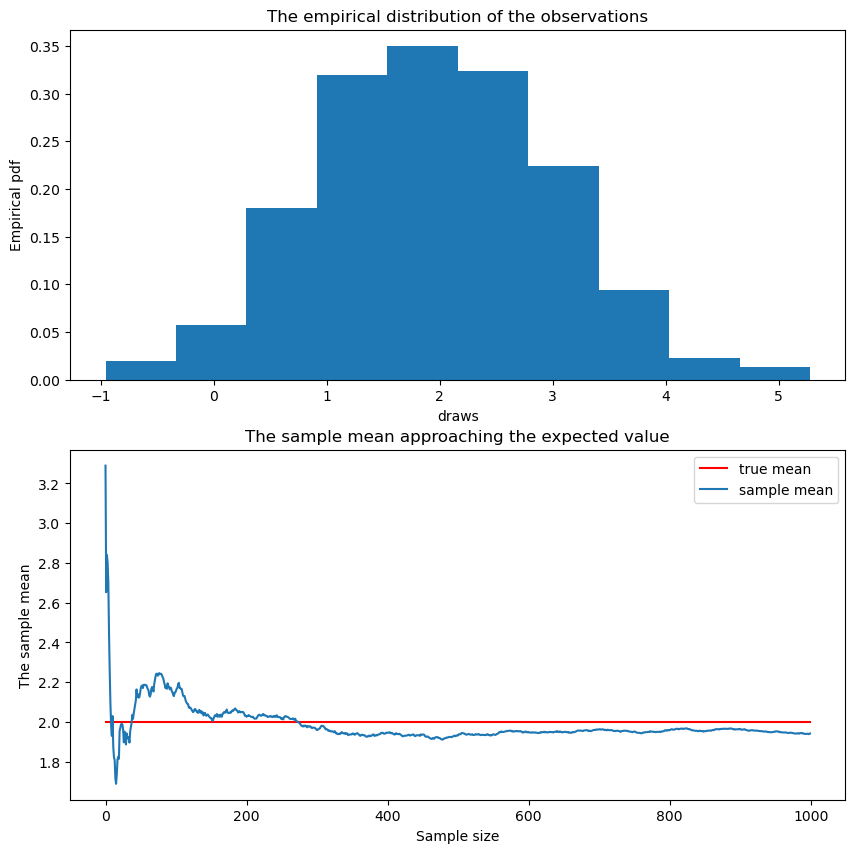

In [6]:



if theorem == 1:
    # initialize vectors
    true_mean_vector = np.ones(sample_size) * true_mean
    sample_mean_vector = np.ones(sample_size)
    sz = len(sample_mean_vector)

    # generate sample from distribution
    if distribution == 1:
        X = np.random.normal(true_mean, np.sqrt(true_variance), sz)
    elif distribution == 2:
        X = np.random.exponential(true_mean, sz)
    else:
        X = np.random.binomial(number_trials, prob_success, sz)
        true_mean = number_trials * prob_success
        true_mean_vector = np.ones(sample_size) * true_mean

    # compute sample mean by adding one observation at the time
    for i in range(sample_size):
        sample_mean_vector[i] = np.mean(X[:i+1])

    # First, we plot the histogram of the simulated data
    fig, axis = plt.subplots(2, 1)
    axis[0].set_xlabel('draws')
    axis[0].set_ylabel('Empirical pdf')
    axis[0].hist(X, density=True)  # adjust 'bins' for smoother graph
    axis[0].set_title('The empirical distribution of the observations')

    # Second, we represent the convergence of the sample mean to the true mean
    axis[1].set_xlabel('Sample size')
    axis[1].set_ylabel('The sample mean')
    axis[1].plot(true_mean_vector, color='red', label = 'true mean')
    axis[1].plot(sample_mean_vector, label = 'sample mean')
    axis[1].set_title('The sample mean approaching the expected value')
    axis[1].legend(loc = 'upper right', )

#-----------------------------------------------------------------------------------------------------------------
# The CLT for the mean WITHOUT standardization - as the number of observations increases, 
# the distribution of the sample mean becomes more and more concentrated around the population mean - 
# In fact, the variance of the sample mean goes to zero
#-----------------------------------------------------------------------------------------------------------------

elif theorem == 2:
    smaller_sample_size = 10
    small_sample = np.ones([smaller_sample_size, number_of_samples])
    sz = small_sample.shape
    larger_sample = np.ones([sample_size, number_of_samples])
    sz1 = larger_sample.shape
    if distribution == 1:
        X_small = np.random.normal(true_mean, np.sqrt(true_variance), sz)
        X_large = np.random.normal(true_mean, np.sqrt(true_variance), sz1)
    elif distribution == 2:
        X_small = np.random.exponential(true_mean, sz)
        X_large = np.random.exponential(true_mean, sz1)
    else:
        X_small = np.random.binomial(number_trials, prob_success, sz)
        X_large = np.random.binomial(number_trials, prob_success, sz1)
        true_mean = number_trials * prob_success
        true_mean_vector = np.ones(sample_size) * true_mean

    mean_small = np.mean(X_small, axis=0)
    mean_large = np.mean(X_large, axis=0)
    plt.hist(mean_small, bins=30, density=True, alpha=0.5, label = 'small sample')
    plt.hist(mean_large, bins=30, density=True, alpha=0.5, label = 'large sample')
    plt.legend(loc = 'upper right')

#--------------------------------------------------------------------------------------------------------------
# The CLT for the mean WITH a standardization - as the number of observations increases,
# the empirical distribution of the standardized sample mean approaches that of a normal 0,1 more and more
#--------------------------------------------------------------------------------------------------------------

elif theorem == 3:
    smaller_sample_size = 10
    small_sample = np.ones([smaller_sample_size, number_of_samples])
    sz = small_sample.shape
    larger_sample = np.ones([sample_size, number_of_samples])
    sz1 = larger_sample.shape

    if distribution == 1:
        X_small = np.random.normal(true_mean, np.sqrt(true_variance), sz)
        X_large = np.random.normal(true_mean, np.sqrt(true_variance), sz1)
    elif distribution == 2:
        X_small = np.random.exponential(true_mean, sz)
        X_large = np.random.exponential(true_mean, sz1)
    else:
        X_small = np.random.binomial(number_trials, prob_success, sz)
        X_large = np.random.binomial(number_trials, prob_success, sz1)
        true_mean = number_trials * prob_success
        true_variance = number_trials * prob_success * (1-prob_success)
        true_mean_vector = np.ones(sample_size) * true_mean

    mean_small = np.mean(X_small, axis=0)
    mean_large = np.mean(X_large, axis=0)
    
    if distribution == 1:
        plt.hist(np.sqrt(smaller_sample_size) * (mean_small - true_mean) / np.sqrt(true_variance), bins=30, density=True, alpha=0.5, label = 'small sample')
        plt.hist(np.sqrt(sample_size) * (mean_large - true_mean) / np.sqrt(true_variance), bins=30, density=True, alpha=0.5, label = 'large sample')
        plt.legend(loc = 'upper right')
        
    elif distribution == 2:
        plt.hist(np.sqrt(smaller_sample_size) * (mean_small - true_mean) / true_mean, bins=30, density=True, alpha=0.5, label = 'small sample')
        plt.hist(np.sqrt(sample_size) * (mean_large - true_mean) / true_mean, bins=30, density=True, alpha=0.5, label = 'large sample')
        plt.legend(loc = 'upper right')
        
    else:
        plt.hist(np.sqrt(smaller_sample_size) * (mean_small - true_mean) / np.sqrt(true_variance), bins=30, density=True, alpha=0.5, label = 'small sample')
        plt.hist(np.sqrt(sample_size) * (mean_large - true_mean) / np.sqrt(true_variance), bins=30, density=True, alpha=0.5, label = 'large sample')
        plt.legend(loc = 'upper right')

#-----------------------------------------------------------------------------------------------------
# Slutsky's theorem: the first sample uses the true standard deviation to standardize, the second
# sample uses an "estimated" standard deviation (by Slutsky's the two are equivalent - asymptotically)
#------------------------------------------------------------------------------------------------------

else:
    sample = np.ones([sample_size, number_of_samples])
    sz = sample.shape

    if distribution == 1:
        X = np.random.normal(true_mean, np.sqrt(true_variance), sz)
    elif distribution == 2:
        X = np.random.exponential(true_mean, sz)
    else:
        X = np.random.binomial(number_trials, prob_success, sz)
        true_mean = number_trials * prob_success
        true_variance = number_trials * prob_success * (1 - prob_success)
        true_mean_vector = np.ones(sample_size) * true_mean

    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0, ddof=1)

    if distribution == 1:
        plt.hist(np.sqrt(sample_size) * (mean - true_mean) / np.sqrt(true_variance), bins=30, density=True, alpha=0.5, label = 'true std')
        plt.hist(np.sqrt(sample_size) * (mean - true_mean) / std_dev, bins=30, density=True, alpha=0.5, label = 'estimated std')
        plt.legend(loc = 'upper right')
        
    elif distribution == 2:
        plt.hist(np.sqrt(sample_size) * (mean - true_mean) / true_mean, bins=30, density=True, alpha=0.5, label = 'true std')
        plt.hist(np.sqrt(sample_size) * (mean - true_mean) / std_dev, bins=30, density=True, alpha=0.5, label = 'estimated std')
        plt.legend(loc = 'upper right')
        
    else:
        plt.hist(np.sqrt(sample_size) * (mean - true_mean) / np.sqrt(true_variance), bins=30, density=True, alpha=0.5, label = 'true std')
        plt.hist(np.sqrt(sample_size) * (mean - true_mean) / std_dev, bins=30, density=True, alpha=0.5, label = 'estimated std')
        plt.legend(loc = 'upper right')